In [1]:
import pandas as pd
from pandas import DataFrame
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
dataset=pd.read_csv('advertising.csv')

In [3]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


DATA PREPROCESSING

In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Handling Outliers

<Axes: ylabel='TV'>

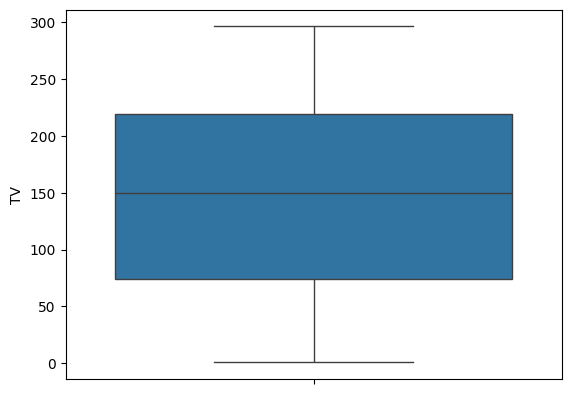

In [7]:
sns.boxplot(dataset["TV"])

<Axes: ylabel='Radio'>

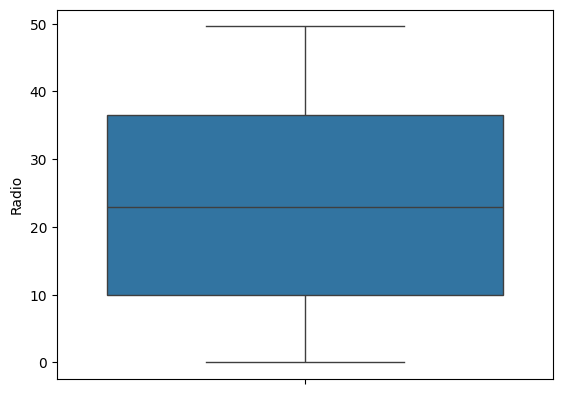

In [8]:
sns.boxplot(dataset["Radio"])

<Axes: ylabel='Newspaper'>

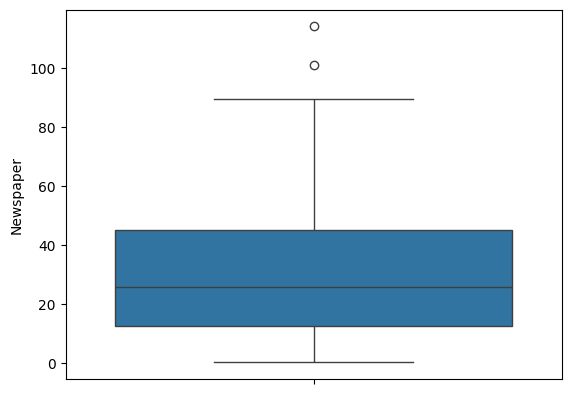

In [9]:
sns.boxplot(dataset["Newspaper"])

In [10]:
Q1 = dataset["Newspaper"].quantile(0.25)
Q3 = dataset["Newspaper"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["Newspaper"] < lower_fence) | (dataset["Newspaper"] > upper_fence)].index)
dataset.shape

(198, 4)

Handling Missing Values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
(198, 4)


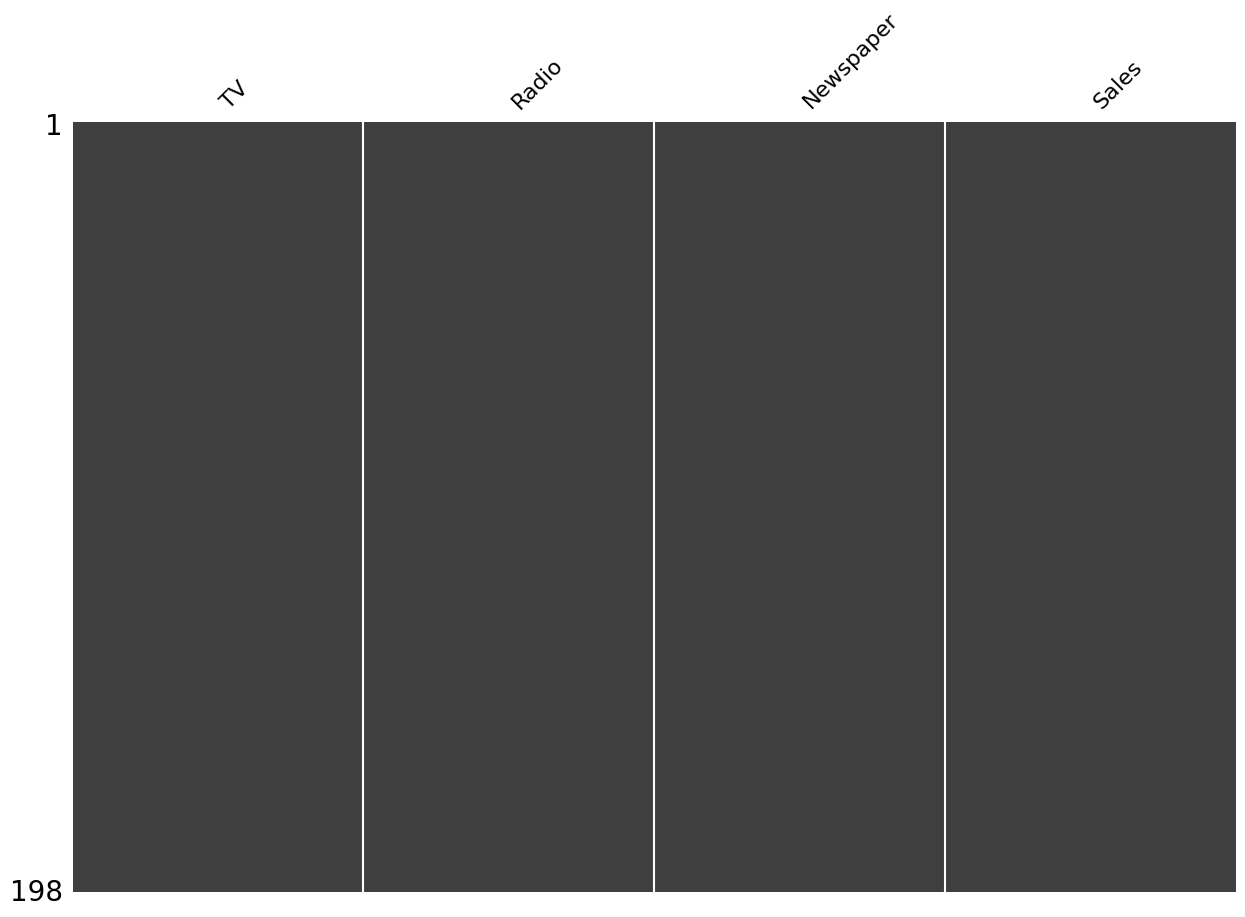

In [11]:
import missingno as msno
print(dataset.isnull().sum())
msno.matrix(dataset,figsize=(15,10),sparkline=False,p=0)
print(dataset.shape)

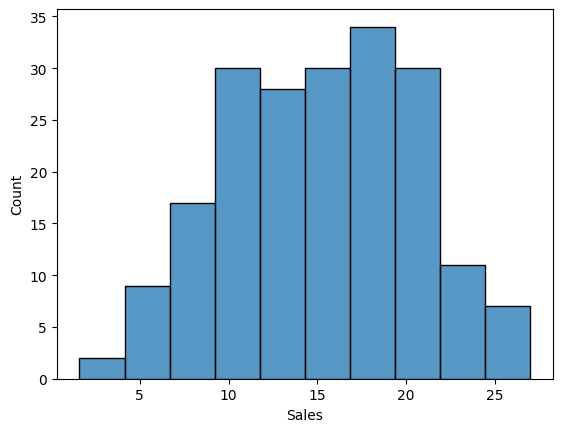

In [12]:
sns.histplot(x='Sales', data=dataset)
plt.show()

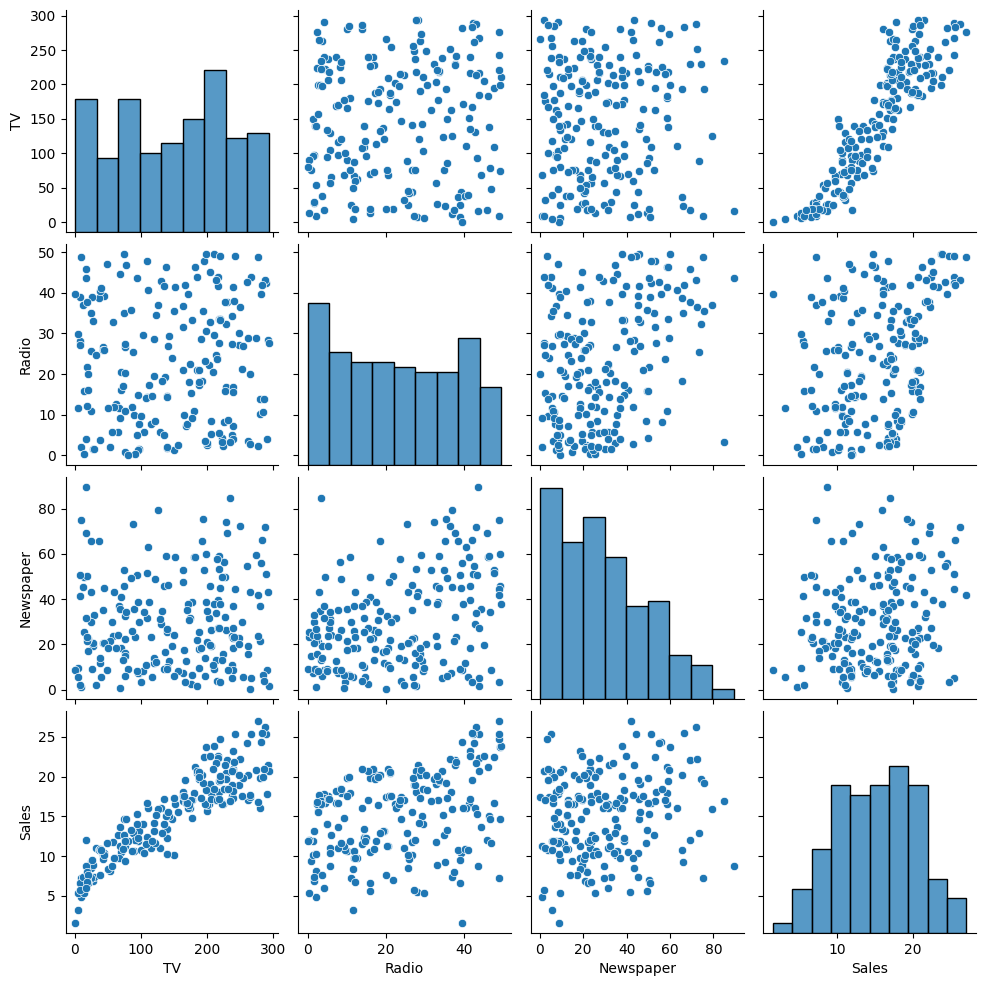

In [13]:
sns.pairplot(data=dataset)
plt.show()

MODEL BUILDING AND EVALUATION

In [14]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:, 0:3]
Y=dataset.iloc[:, -1]
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,random_state=0,train_size=0.70)

In [15]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [17]:
import math
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
print('mse =',mean_squared_error(Y_pred,Y_test))
print('rmse =',math.sqrt(mean_squared_error(Y_pred,Y_test)))
print(f"Model: y = {regressor.coef_[0]}*x1 + {regressor.coef_[1]}*x2 + {regressor.coef_[2]}*x3 + {regressor.intercept_}")

mse = 2.5245302415840842
rmse = 1.5888770379057293
Model: y = 0.052582666163946315*x1 + 0.10228783248549418*x2 + 0.009706620035663619*x3 + 4.662223855618503
